# Growth of stimulus-specific and decision-consistent biases

Model predictions for Figure 3e-l.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import wilcoxon
from statsmodels.stats.weightstats import DescrStatsW

from dynamic_bias import utils
utils.setup_matplotlib()

In [2]:
utils.download_dataset("data/outputs/ddm")

stim_list   = utils.exp_stim_list(step=0.75)
ssb_funs    = utils.load(f'{utils.ORIGIN}/data/outputs/ddm/results_stimulus_conditioned.pickle')
ssb_weights = utils.load(f'{utils.ORIGIN}/data/outputs/ddm/results_stimulus_specific_bias_weight.pickle')
dcb_funs    = utils.load(f'{utils.ORIGIN}/data/outputs/ddm/results_decision_conditioned.pickle')

downloading data/outputs/ddm...
data/outputs/ddm already exists. Skipping download...


---
## Stimulus-specific bias 

Drift-diffusion model


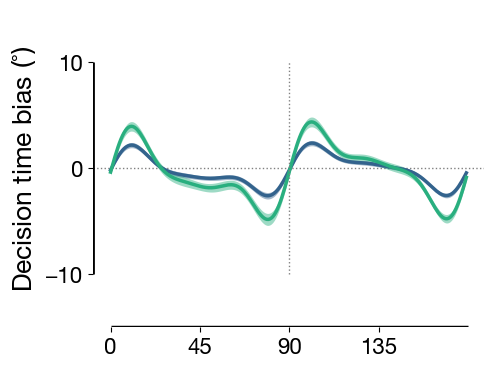

In [3]:
mE, sE = utils.meanstats(ssb_funs['full']['early'], axis=0)
mL, sL = utils.meanstats(ssb_funs['full']['late'], axis=0)

print( 'Drift-diffusion model' )
plt.figure()
ax = plt.gca()
utils.set_size([4,3])

plt.plot(stim_list, mE, color=utils.E_COLOR,linewidth=2.5)
plt.plot(stim_list, mL, color=utils.L_COLOR,linewidth=2.5)

plt.vlines(x=90, ymin=-10, ymax=10, linestyle='dotted', color='gray', linewidth=1.)
plt.axhline(y=0, linestyle='dotted', color='gray', linewidth=1., zorder=-3)
plt.fill_between(x=stim_list, y1=mE-sE, y2=mE+sE, color=utils.E_COLOR, alpha=0.45, linewidth=0)
plt.fill_between(x=stim_list, y1=mL-sL, y2=mL+sL, color=utils.L_COLOR, alpha=0.45, linewidth=0)
plt.ylim([-15,15])

if utils.LABEL:
    # plt.xlabel(r"Orientation $(\!\!^\circ\!\!)$")
    plt.ylabel(r"Decision time bias $(\!\!^\circ\!\!)$")

utils.draw_publish_axis(ax, xrange=(0,180), yrange=(-10,10), xticks=[0,45,90,135], yticks=[-10,0,10])

plt.savefig(f'{utils.DIR_FIGURE}/fig3e.pdf', bbox_inches='tight', transparent=True)
plt.show()

Diffusion-only model


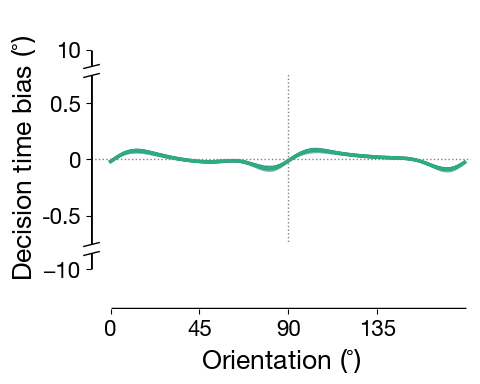

In [4]:
mE, sE = utils.meanstats(ssb_funs['reduced']['early'], axis=0)
mL, sL = utils.meanstats(ssb_funs['reduced']['late'], axis=0)

print( 'Diffusion-only model' )
f,ax = plt.subplots(3,1, gridspec_kw={'height_ratios':[1,3,1]})
plt.subplots_adjust(hspace=0.1)
utils.set_size([3.8,3])

ax[1].plot(stim_list, mE, color=utils.E_COLOR,linewidth=2.5)
ax[1].plot(stim_list, mL, color=utils.L_COLOR,linewidth=2.5)
ax[1].fill_between(x=stim_list, y1=mE-sE, y2=mE+sE, color=utils.E_COLOR, alpha=0.45, linewidth=0)
ax[1].fill_between(x=stim_list, y1=mL-sL, y2=mL+sL, color=utils.L_COLOR, alpha=0.45, linewidth=0)

ost = 10 # offset for axis
for ifig in range(3):
    ax[ifig].set_xlim([0-ost,172.5+ost])
    if ifig < 2:
        ax[ifig].spines['bottom'].set_visible(False)
        ax[ifig].set_xticks([])
    if ifig > 0:
        ax[ifig].spines['top'].set_visible(False)

ax[1].axhline(y=0,  linestyle='dotted', color='gray', linewidth=1.)
ax[1].vlines(x=90, ymin=-10, ymax=10, linestyle='dotted', color='gray', linewidth=1.)
ax[0].set_ylim([8,15])
ax[1].set_ylim([-0.75,0.75])
ax[2].set_ylim([-15,-8])

# 
d = .25  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax[0].plot(0,0,transform=ax[0].transAxes, **kwargs)
ax[1].plot(0,1,transform=ax[1].transAxes, **kwargs)
ax[1].plot(0,0,transform=ax[1].transAxes, **kwargs)
ax[2].plot(0,1,transform=ax[2].transAxes, **kwargs)

utils.draw_publish_axis(ax[0], xrange=None, yrange=[-10,10], xticks=None, yticks=[10], tight_layout=False)
utils.draw_publish_axis(ax[1], xrange=None, yrange=[-10,10], xticks=None, yticks=[-0.5,0,0.5], tight_layout=False)
utils.draw_publish_axis(ax[2], xrange=(0,180), yrange=[-10,10], xticks=[0,45,90,135], yticks=[-10], tight_layout=False)
ax[1].set_yticklabels(['-0.5','0','0.5'])

if utils.LABEL:
    ax[2].set_xlabel(r"Orientation $(\!\!^\circ\!\!)$")
    f.text(-0.04, 0.5, r"Decision time bias $(\!\!^\circ\!\!)$", va='center', rotation='vertical', fontsize=19)

plt.savefig(f'{utils.DIR_FIGURE}/fig3i.pdf', bbox_inches='tight', transparent=True)
plt.show()

Drift-diffusion model
Bias weight: Early vs. Late

Paired samples t-test
t(49)= 48.22383713552612 p= 5.8490899792131614e-43
95% CI= (0.26193798715857775, 0.2847181450714328)

Wilcoxon signed-rank test (without continuity correction)
V= 0.0 p= 1.7763568394002505e-15


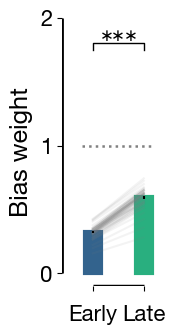

Diffusion-only model
Bias weight: Early vs. Late

Paired samples t-test
t(49)= -0.9212707955933924 p= 0.36142286736440077
95% CI= (-1.426155699292966e-17, 5.295711757513781e-18)

Wilcoxon signed-rank test (without continuity correction)
V= 105.0 p= 0.19849698681675743


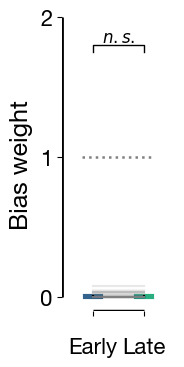

In [6]:
for i_models, v_models in enumerate(['full', 'reduced']):

    plt.figure()
    ax = plt.gca()
    if i_models == 0:
        print('Drift-diffusion model')
        utils.set_size([1.6,2.75])
    if i_models == 1:
        print('Diffusion-only model')
        utils.set_size([1.6,3.00])

    xl, xr = -1, 1.5
    v_E, v_L = ssb_weights[v_models]['early'], ssb_weights[v_models]['late']
    ms, ss = zip(*[utils.meanstats(v) for v in [v_E,v_L]])
    for i in range(50):
        plt.plot([xl,xr], [v_E[i],v_L[i]], color='gray', alpha=0.09)

    bar = plt.bar(x=[xl,xr], height=ms, color=[utils.E_COLOR, utils.L_COLOR])
    bar[0].set_edgecolor(utils.E_COLOR)
    bar[1].set_edgecolor(utils.L_COLOR)
    bar[0].set_linewidth(3)
    bar[1].set_linewidth(3)
    plt.errorbar(x=[xl,xr], y=ms, yerr=ss, fmt="none", color="k")

    plt.xlim([xl-1.5,xr+1.5])
    plt.ylim([-0.1,2])
    plt.xticks([-1,1.5], ['Early', 'Late'])
    ax.hlines(y=1, xmin=xl-0.5, xmax=xr+0.5, linestyle='dotted', color='gray', linewidth=1.8, zorder=-3)

    # Add significance asterisks
    ax.plot([xl, xl, xr, xr], [1.75, 1.8, 1.8, 1.75], lw=1, c='k')
    if i_models == 0:
        ax.text((xl+xr)/2., 1.8, r"$ {\ast\!\!\ast\!\!\!\ast} $", ha='center', va='bottom', color='k', fontsize=12)
    if i_models == 1:
        ax.text((xl+xr)/2., 1.8, r"$n.s.\!\!$", ha='center', va='bottom', color='k', fontsize=12)

    if utils.LABEL:
        plt.ylabel(r"Bias weight", labelpad=5, fontsize=18)
        if i_models == 0:
            plt.tick_params(axis='x', which='major', pad=10)
        if i_models == 1:
            plt.tick_params(axis='x', which='major', pad=15)
        plt.xticks([xl,xr], ['Early', 'Late'], fontsize=16)


    ttest  = DescrStatsW(v_L-v_E)
    wilcox = wilcoxon(v_L-v_E)
    print("Bias weight: Early vs. Late")
    print('\nPaired samples t-test')
    print('t(49)=',  ttest.ttest_mean()[0], 'p=', ttest.ttest_mean()[1])
    print('95% CI=', ttest.tconfint_mean())
    print('\nWilcoxon signed-rank test (without continuity correction)')
    print('V=', wilcox[0], 'p=', wilcox[1])

    fign = ['f','j'][i_models]
    utils.draw_publish_axis(ax, xrange=(xl,xr), yrange=(0,2), xticks=None, yticks=[0,1,2])
    plt.savefig(f'{utils.DIR_FIGURE}/fig3{fign}.pdf', bbox_inches='tight', transparent=True)
    plt.show()

---
## Decision-consistent bias 

Drift-diffusion model
Decision-consistent bias: Early vs. Late

Paired samples t-test
t(49)= -11.641101484473127 p= 1.0247871065239079e-15
95% CI= (-1.9308924097533136, -1.3623823428914545)

Wilcoxon signed-rank test (without continuity correction)
V= 0.0 p= 1.7763568394002505e-15


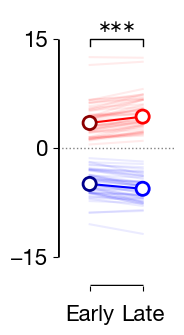

Diffusion-only model
Decision-consistent bias: Early vs. Late

Paired samples t-test
t(49)= -4.231854485285132 p= 0.00010126705863774301
95% CI= (-0.8398251796862664, -0.2990222040311983)

Wilcoxon signed-rank test (without continuity correction)
V= 0.0 p= 0.00043777719457466354


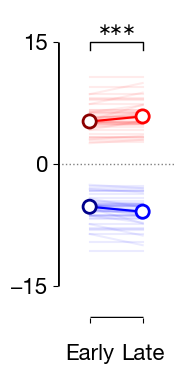

In [6]:
for i_models, v_models in enumerate(['full', 'reduced']):

    plt.figure()
    ax = plt.gca()

    if i_models == 0:
        print('Drift-diffusion model')
        utils.set_size([1.6,2.75])
    if i_models == 1:
        print('Diffusion-only model')
        utils.set_size([1.6,3.05])

    xl, xr = -1, 1.5
    v_Ecw  = dcb_funs['combined'][v_models]['early']['cw']  
    v_Eccw = dcb_funs['combined'][v_models]['early']['ccw'] 
    v_Lcw  = dcb_funs['combined'][v_models]['late']['cw']   
    v_Lccw = dcb_funs['combined'][v_models]['late']['ccw']  

    v_Lcw[np.abs(v_Ecw-v_Lcw)<1e-4]    = v_Ecw[np.abs(v_Ecw-v_Lcw)<1e-4]
    v_Lccw[np.abs(v_Eccw-v_Lccw)<1e-4] = v_Eccw[np.abs(v_Eccw-v_Lccw)<1e-4]

    ms_cw  = [np.median(v_Ecw), np.median(v_Lcw)]
    ss_cw  = [np.std(v_Ecw)/np.sqrt(50), np.std(v_Lcw)/np.sqrt(50)]
    ms_ccw = [np.median(v_Eccw), np.median(v_Lccw)]
    ss_ccw = [np.std(v_Eccw)/np.sqrt(50), np.std(v_Lccw)/np.sqrt(50)]

    plt.plot([xl, xr], [ms_cw[0], ms_cw[-1]],   color='red', zorder=0)
    plt.plot([xl, xr], [ms_ccw[0], ms_ccw[-1]], color='blue', zorder=0)
    plt.axhline(y=0,  linestyle='dotted', color='gray', linewidth=1.)

    plt.errorbar(x=[xl], y=ms_cw[0], yerr=ss_cw[0], fmt="none", color="darkred")
    plt.errorbar(x=[xr], y=ms_cw[-1], yerr=ss_cw[-1], fmt="none", color="red")
    plt.scatter(x=[xl,xr], y=ms_cw, edgecolors=["darkred", "red"], s=90, color='white', zorder=3, lw=2)
    for i in range(50):
        plt.plot([xl,xr], [v_Ecw[i],v_Lcw[i]], color='red', alpha=0.08)

    plt.errorbar(x=[xl], y=ms_ccw[0], yerr=ss_ccw[0], fmt="none", color="darkblue")
    plt.errorbar(x=[xr], y=ms_ccw[-1], yerr=ss_ccw[-1], fmt="none", color="blue")
    plt.scatter(x=[xl,xr], y=ms_ccw, edgecolors=["darkblue", "blue"], s=90, color='white', zorder=3, lw=2)
    for i in range(50):
        plt.plot([xl,xr], [v_Eccw[i],v_Lccw[i]], color='blue', alpha=0.08)  

    plt.xlim([xl-1.5,xr+1.5])
    plt.ylim([-19,19])

    # Add significance asterisks
    plt.plot([xl, xl, xr, xr], [14, 15, 15, 14], lw=1, c='k')
    plt.text((xl+xr)/2., 15.5, r"$ {\ast\!\!\ast\!\!\!\ast} $", ha='center', va='bottom', color='k', fontsize=12)

    ttest  = DescrStatsW((v_Lccw-v_Lcw)-(v_Eccw-v_Ecw))
    wilcox = wilcoxon((v_Lccw-v_Lcw)-(v_Eccw-v_Ecw))
    print("Decision-consistent bias: Early vs. Late")
    print('\nPaired samples t-test')
    print('t(49)=',  ttest.ttest_mean()[0], 'p=', ttest.ttest_mean()[1])
    print('95% CI=', ttest.tconfint_mean())
    print('\nWilcoxon signed-rank test (without continuity correction)')
    print('V=', wilcox[0], 'p=', wilcox[1])

    if utils.LABEL:
        # plt.ylabel(r"Estimation error $(\!\!^\circ\!\!)$")    
        if i_models == 0:
            plt.tick_params(axis='x', which='major', pad=10)
        if i_models == 1:
            plt.tick_params(axis='x', which='major', pad=15)

        plt.xticks([xl,xr], ['Early', 'Late'], fontsize=16)

    utils.draw_publish_axis(ax, xrange=(-1,1.5), yrange=(-15,15), xticks=None, yticks=[-15,0,15])
    fign = ['h','l'][i_models]
    plt.savefig(f'{utils.DIR_FIGURE}/fig3{fign}.pdf', bbox_inches='tight', transparent=True)
    plt.show()

Drift-diffusion model


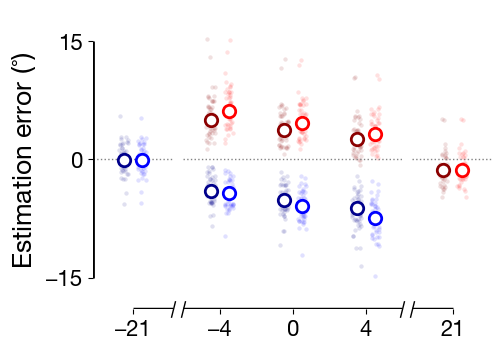

Diffusion-only model


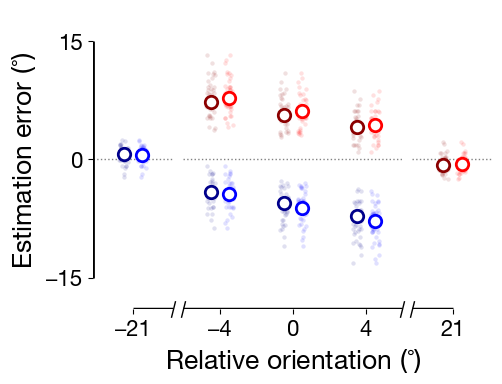

In [7]:
for i_models, v_models in enumerate(['full', 'reduced']):

    if i_models == 0:
        print('Drift-diffusion model')
    if i_models == 1:
        print('Diffusion-only model')

    f, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1.1, 3, 1.1]})
    plt.subplots_adjust(wspace=0.08)
    utils.set_size([4, 3])

    devi = 0.5  # deviation for scatter plot
    for ifig in range(3):
        ax[ifig].axhline(y=0, linestyle='dotted', color='gray', linewidth=1.0)

    v_choices = ['cw', 'ccw']
    np.random.seed(2023)
    for i_evi, v_evi in enumerate( utils.exp_ref_list() ):
        ifig = [0, 1, 1, 1, 2][i_evi] # figure index

        # early
        v_choices = ['cw', 'ccw']
        for v_delay, v_colors in zip(['early', 'late'], [['darkred', 'darkblue'], ['red', 'blue']]):

            _s = -1 if v_delay == 'early' else +1  # sign for scatter plot

            for v_choice, v_color in zip(v_choices, v_colors):

                if ( (v_evi == -21) & (v_choice == 'cw') ) | ( (v_evi ==  21) & (v_choice == 'ccw') ):
                    continue # lapse omitted for visualization

                _v = dcb_funs['refwise'][v_models][v_delay][v_choice][:,i_evi]
                _m, _ = utils.meanstats(_v, median=True)
                _j = np.random.uniform(-devi / 2, devi / 2, size=50) # jitter

                ax[ifig].scatter(v_evi + _s*devi,      _m, color='white', edgecolor=v_color, zorder=3, lw=2, s=80)
                ax[ifig].scatter(v_evi + _s*devi + _j, _v, color=v_color, alpha=0.12, linewidth=0, s=10, zorder=0)


    d = 4.0  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax[0].plot(1, 0, transform=ax[0].transAxes, **kwargs)
    ax[1].plot(0, 0, transform=ax[1].transAxes, **kwargs)
    ax[1].plot(1, 0, transform=ax[1].transAxes, **kwargs)
    ax[2].plot(0, 0, transform=ax[2].transAxes, **kwargs)

    # 
    ost = 2  # offset for broken axis
    ax[0].set_xlim([-21 - ost * 1.1, -21 + ost * 1.1])
    ax[1].set_xlim([-4 - ost, 4 + ost])
    ax[2].set_xlim([21 - ost * 1.1, 21 + ost * 1.1])
    for ifig in range(3):
        ax[ifig].set_ylim([-19, 19])
        if ifig >= 1:
            ax[ifig].spines['left'].set_visible(False)
            ax[ifig].set_yticks([])

    if utils.LABEL:
        ax[0].set_ylabel(r"Estimation error $(\!\!^\circ\!\!)$")    
        if i_models == 1:
            ax[1].set_xlabel(r"Relative orientation $(\!\!^\circ\!\!)$")

    utils.draw_publish_axis(ax[0], xrange=(-21, 21), yrange=(-15, 15), xticks=[-21], yticks=[-15, 0, 15], tight_layout=False)
    utils.draw_publish_axis(ax[1], xrange=(-21, 21), yrange=None, xticks=[-4, 0, 4], yticks=None, tight_layout=False)
    utils.draw_publish_axis(ax[2], xrange=(-21, 21), yrange=None, xticks=[21], yticks=None, tight_layout=False)

    fign = ['g', 'k'][i_models]
    plt.savefig(f'{utils.DIR_FIGURE}/fig3{fign}.pdf', bbox_inches='tight', transparent=True)
    plt.show()
